# Problema 8.15

In [1]:
using SymPy, Plots, LaTeXStrings, DSP, Roots, Interpolations

t, w = symbols("t omega", real=true)
@vars s

function bode(Gol; wmin=1e-1, wmax=1e1, points=100, stab=false)
    Gw = Gol(s=>im*w)

    RAol = sqrt(real(Gw)^2+imag(Gw)^2)
    phiol = sympy.atan2(imag(Gw), real(Gw))

    wlog = range(log10(wmin), log10(wmax); length=points)
    wlin = 10 .^wlog
    philam = lambdify(phiol)
    phidata = philam.(wlin)
    DSP.unwrap!(phidata)

    
    if stab
        itp = LinearInterpolation(wlin,phidata)
        f(x) = itp(x)+pi
        wco = find_zero(f, (wmin, wmax))
        RAco = RAol(wco)
        phico = itp(wco)
        
        w1 = find_zero(RAol-1, (wmin, wmax))
        RA1 = RAol(w1)
        phi1 = itp(w1)
    end

    l = @layout [a; b]
    RAplot = plot(RAol, wmin, wmax, xscale=:log10, yscale=:log10,
        legend=false, lw=2, xlabel="", ylabel="RA",
        minorticks=:auto)
    RAminscale = ylims(RAplot)[1]
    if stab
        plot!([wmin, wco, wco],[RAco, RAco, RAminscale], color=:red, 
            annotations= (wco, float(RAco), text(L"w_{co}, RA_{co}", pointsize=10, :left)))
        plot!([wmin, w1, w1], [RA1, RA1, RAminscale], color=:lime, 
            annotations= (w1, float(RA1), text(L"w_1, 1", pointsize=10, :left)))
    end
    phiplot = plot(wlin, phidata*180/pi, xscale=:log10,
        legend=false, lw=2, xlabel="ω", ylabel="φ",
        minorticks=:auto)
    phiminscale = ylims(phiplot)[1]
    if stab
        plot!([wmin, wco, wco],[phico*180/pi, phico*180/pi, phiminscale],
            color=:red, annotations= (wco ,float(phico*180/pi), text(L"w_{co}, -180\degree",
                    pointsize=10, :left)))
        plot!([wmin, w1, w1], [phi1*180/pi, phi1*180/pi, phiminscale], color=:lime,
        annotations = (w1, float(phi1*180/pi), text(L"w_1, \phi_1", pointsize=10, :left)))
    end

    display(plot(RAplot, phiplot, layout=l))
    if stab
        return wco, RAco, phico, w1, RA1, phi1
    end
end

bode (generic function with 1 method)

In [4]:
Gol = 1/(s+1)/(2s+1)

        1        
─────────────────
(s + 1)⋅(2⋅s + 1)

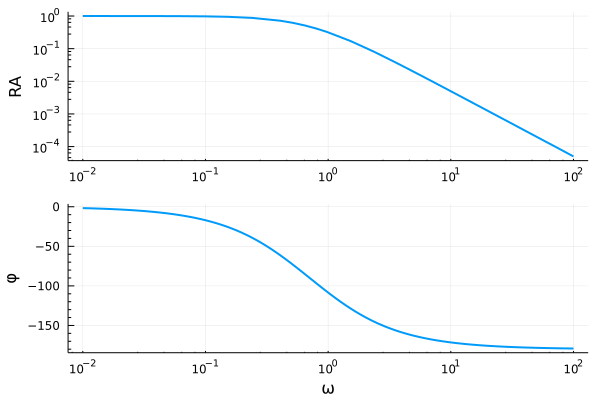

In [6]:
bode(Gol; wmin=1e-2, wmax=100)